# Colisão Elástica

## Esquema da simulação de uma colisão:

#### . Constantes
###### _ m1, m2 (massas em kg)
###### _ v01, v02 (velocidades iniciais em m/s)
###### _ x01, x02 (posições iniciais em m)
###### _ tempo_simulacao (em s)
#### . Velocidade final
###### _ v1 = ((m1 - m2) * v01 + 2 * m2 * v02) / (m1 + m2)
###### _ v2 = ((m2 - m1) * v02 + 2 * m1 * v01) / (m1 + m2)
#### . Onde e quando ocorreu a colisão
###### _ x1 = x01 + v01 * t
###### _ x2 = x02 + v02 * t
###### _ x1 = x2 -> xc (x de colisão)
###### _ quando: x01 + v01 * tc = x02 + v02 * tc  -> tc (tempo de colisão) = (x01 - x02) / (v02 - v01)
###### _ onde: xc = x01 + v01 * tc
### - Código:
#### . Bibliotecas
###### _ matplotlib.pyplot as plt
###### _ matplotlib.animation as animation
###### _ numpy as np

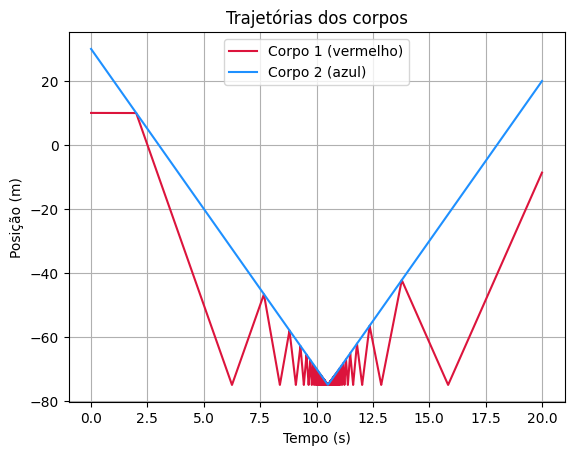

3140


" \nfig, ax = plt.subplots(figsize=(10, 5))\nax.set_xlim(0, 60)  # expandido para seguir o corpo leve após colisão\nax.set_ylim(-1, 1)\nax.set_title('Animação da Colisão Elástica')\nax.set_xlabel('Posição (m)')\nax.set_ylabel('Altura (m)')\nax.grid(True)\n\n# Iniciando os corpos\n(ball1,) = ax.plot([], [], 'ro', markersize=20)\n(ball2,) = ax.plot([], [], 'bo', markersize=20)\n\n# Atualização da animação\ndef update(frame):\n    ball1.set_data([x1[frame]], [0])\n    ball2.set_data([x2[frame]], [0])\n    return ball1, ball2\n\n# Função de atualização\n#def init():\n#    ball1.set_data([], [])\n#    ball2.set_data([], [])\n#    return ball1, ball2\n\n#ani = animation.FuncAnimation(\n#    fig=fig, func=update, init_func=init,\n#    frames=len(t), interval=1000 / 60, blit=True\n#)\n\n# Animação\nani = animation.FuncAnimation(fig=fig, func=update, frames=len(t), interval=1000 / 60, blit=True)\n\n# Exibir animação\nplt.show()\n"

In [32]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# BASE FÍSICA

# Definindo constantes
m1, m2 = 10, 10000000  # massas em kg
v01, v02 = 0, -10  # velocidades iniciais em m/s
x01, x02 = 10, 30  # posições iniciais em metros
x_parede = -75 # posição da parede em metros
tempo_simulacao = 20  # segundos

# Função para velocidades após colisão elástica unidimensional
def velocidades_depois_colisao(massa_corpo1, massa_corpo2, velocidade_corpo1, velocidade_corpo2):
    """
    Essa função utiliza a equação de colisão elástica unidimensional entre dois corpos para calcular a velocidade de cada corpo após a colisão.

    Argumentos:
    massa_corpo1: massa do corpo 1
    massa_corpo2: massa do corpo 2 
    velcocidade_corpo1: velocidade do corpo 1 antes da colisão
    velocidade_corpo2: velocidade do corpo 2 antes da colisão

    Retornos:
    v1: velocidade do corpo 1 após a colisão 
    v2: velocidade do corpo 2 após a colisão
    """
    v1 = ((massa_corpo1 - massa_corpo2) * velocidade_corpo1 + 2 * massa_corpo2 * velocidade_corpo2) / (massa_corpo1 + massa_corpo2)
    v2 = ((massa_corpo2 - massa_corpo1) * velocidade_corpo2 + 2 * massa_corpo1 * velocidade_corpo1) / (massa_corpo1 + massa_corpo2)
    
    return v1, v2

# Função posição
def pos(x0, v0, t):
    """
    Essa função utiliza a equação horária da posição para calcular a posição de um corpo a velocidade constante

    Argumentos:
    x0: posição inicial
    v0: velocidade inicial
    t: tempo de movimento

    Retorno:
    Posição do corpo no tempo t 
    """
    return x0 + v0 * t

# Colisão elástica com a parede
def colisao_com_parede(v0):
    """Essa função retorna a velocidade de um corpo que colide com uma parede imóvel de forma elástica"""
    return -v0

# Análise dos dados (Precisa ser atualizada para a simulação completa)
"""
print(f"Tempo de colisão: {tempo_colisao:.2f}s")
print(f"Posição da colisão: {pos_colisao:.2f}m")
print(f"Velocidades após colisão: v1 = {v1:.2f} m/s, v2 = {v2:.2f} m/s")
"""

#Variáveis para a simulação
t = np.linspace(0, tempo_simulacao, 120000 * tempo_simulacao) # Lista de tempos para simulação (60 fps)
x1, x2 = [], [] # Listas de posições ao longo da simulação
x1_simulado, x2_simulado = x01, x02 # Posições temporárias durante a simulação
v1_simulado, v2_simulado = v01, v02 # Velocidades temporárias durante a simulação
passo_de_tempo = 1 / 120000 # Variação de tempo entre cada instante simulado
contador = 0

# Simulação
for i in t:

    #Atualiza a posição
    x1_simulado = pos(x1_simulado, v1_simulado, passo_de_tempo)
    x2_simulado = pos(x2_simulado, v2_simulado, passo_de_tempo)

    #Checa a colisão entre os blocos
    if x1_simulado >= x2_simulado:
        v1_simulado, v2_simulado = velocidades_depois_colisao(m1, m2, v1_simulado, v2_simulado)
        x1_simulado = x2_simulado
        contador += 1

    #Checa a colisão com a pareda
    if x1_simulado <= x_parede:
        v1_simulado = colisao_com_parede(v1_simulado)
        x1_simulado = x_parede
        contador +=1

    #Atualiza a lista de posições
    x1.append(x1_simulado)
    x2.append(x2_simulado)

# Gráfico de trajetórias 
plt.figure()
plt.plot(t, x1, label='Corpo 1 (vermelho)', color = 'crimson')
plt.plot(t, x2, label='Corpo 2 (azul)', color = 'dodgerblue')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.title('Trajetórias dos corpos')
plt.grid(True)
plt.legend()
plt.show()

print(contador)

# ANIMAÇÃO (Requer Correção)
""" 
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, 60)  # expandido para seguir o corpo leve após colisão
ax.set_ylim(-1, 1)
ax.set_title('Animação da Colisão Elástica')
ax.set_xlabel('Posição (m)')
ax.set_ylabel('Altura (m)')
ax.grid(True)

# Iniciando os corpos
(ball1,) = ax.plot([], [], 'ro', markersize=20)
(ball2,) = ax.plot([], [], 'bo', markersize=20)

# Atualização da animação
def update(frame):
    ball1.set_data([x1[frame]], [0])
    ball2.set_data([x2[frame]], [0])
    return ball1, ball2

# Função de atualização
#def init():
#    ball1.set_data([], [])
#    ball2.set_data([], [])
#    return ball1, ball2

#ani = animation.FuncAnimation(
#    fig=fig, func=update, init_func=init,
#    frames=len(t), interval=1000 / 60, blit=True
#)

# Animação
ani = animation.FuncAnimation(fig=fig, func=update, frames=len(t), interval=1000 / 60, blit=True)

# Exibir animação
plt.show()
"""

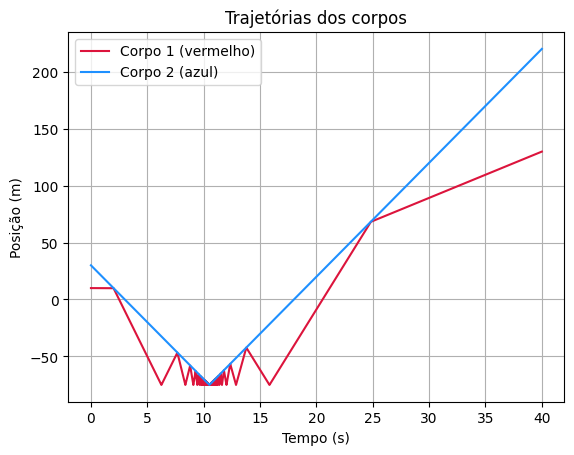

Ocorreram 3141 colisões durante a simulação
O tempo para simular foi de 24.2022 segundos


" \nfig, ax = plt.subplots(figsize=(10, 5))\nax.set_xlim(0, 60)  # expandido para seguir o corpo leve após colisão\nax.set_ylim(-1, 1)\nax.set_title('Animação da Colisão Elástica')\nax.set_xlabel('Posição (m)')\nax.set_ylabel('Altura (m)')\nax.grid(True)\n\n# Iniciando os corpos\n(ball1,) = ax.plot([], [], 'ro', markersize=20)\n(ball2,) = ax.plot([], [], 'bo', markersize=20)\n\n# Atualização da animação\ndef update(frame):\n    ball1.set_data([x1[frame]], [0])\n    ball2.set_data([x2[frame]], [0])\n    return ball1, ball2\n\n# Função de atualização\n#def init():\n#    ball1.set_data([], [])\n#    ball2.set_data([], [])\n#    return ball1, ball2\n\n#ani = animation.FuncAnimation(\n#    fig=fig, func=update, init_func=init,\n#    frames=len(t), interval=1000 / 60, blit=True\n#)\n\n# Animação\nani = animation.FuncAnimation(fig=fig, func=update, frames=len(t), interval=1000 / 60, blit=True)\n\n# Exibir animação\nplt.show()\n"

In [40]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import time

# BASE FÍSICA

# Definindo constantes
m1, m2 = 10, 10000000  # massas em kg
v01, v02 = 0, -10  # velocidades iniciais em m/s
x01, x02 = 10, 30  # posições iniciais em metros
x_parede = -75 # posição da parede em metros
tempo_simulacao = 40  # segundos

# Função para velocidades após colisão elástica unidimensional
def velocidades_depois_colisao(massa_corpo1, massa_corpo2, velocidade_corpo1, velocidade_corpo2):
    """
    Essa função utiliza a equação de colisão elástica unidimensional entre dois corpos para calcular a velocidade de cada corpo após a colisão.

    Argumentos:
    massa_corpo1: massa do corpo 1
    massa_corpo2: massa do corpo 2 
    velcocidade_corpo1: velocidade do corpo 1 antes da colisão
    velocidade_corpo2: velocidade do corpo 2 antes da colisão

    Retornos:
    v1: velocidade do corpo 1 após a colisão 
    v2: velocidade do corpo 2 após a colisão
    """
    v1 = ((massa_corpo1 - massa_corpo2) * velocidade_corpo1 + 2 * massa_corpo2 * velocidade_corpo2) / (massa_corpo1 + massa_corpo2)
    v2 = ((massa_corpo2 - massa_corpo1) * velocidade_corpo2 + 2 * massa_corpo1 * velocidade_corpo1) / (massa_corpo1 + massa_corpo2)
    
    return v1, v2

# Função posição
def pos(x0, v0, t):
    """
    Essa função utiliza a equação horária da posição para calcular a posição de um corpo a velocidade constante

    Argumentos:
    x0: posição inicial
    v0: velocidade inicial
    t: tempo de movimento

    Retorno:
    Posição do corpo no tempo t 
    """
    return x0 + v0 * t

# Colisão elástica com a parede
def colisao_com_parede(v0):
    """Essa função retorna a velocidade de um corpo que colide com uma parede imóvel de forma elástica"""
    return -v0

# Análise dos dados (Precisa ser atualizada para a simulação completa)
"""
print(f"Tempo de colisão: {tempo_colisao:.2f}s")
print(f"Posição da colisão: {pos_colisao:.2f}m")
print(f"Velocidades após colisão: v1 = {v1:.2f} m/s, v2 = {v2:.2f} m/s")
"""

#Variáveis para a simulação
t = np.linspace(0, tempo_simulacao, 120000 * tempo_simulacao) # Lista de tempos para simulação (60 fps)
x1, x2 = [], [] # Listas de posições ao longo da simulação
x1_simulado, x2_simulado = x01, x02 # Posições temporárias durante a simulação
v1_simulado, v2_simulado = v01, v02 # Velocidades temporárias durante a simulação
passo_de_tempo = 1 / 120000 # Variação de tempo entre cada instante simulado
contador = 0

tempo_inicio = time.time()

# Simulação
for i in t:

    #Atualiza a posição
    x1_simulado = pos(x1_simulado, v1_simulado, passo_de_tempo)
    x2_simulado = pos(x2_simulado, v2_simulado, passo_de_tempo)

    #Checa a colisão entre os blocos
    if x1_simulado >= x2_simulado:
        v1_simulado, v2_simulado = velocidades_depois_colisao(m1, m2, v1_simulado, v2_simulado)
        x1_simulado = x2_simulado
        contador += 1

    #Checa a colisão com a pareda
    if x1_simulado <= x_parede:
        v1_simulado = colisao_com_parede(v1_simulado)
        x1_simulado = x_parede
        contador +=1

    #Atualiza a lista de posições
    x1.append(x1_simulado)
    x2.append(x2_simulado)

# Gráfico de trajetórias 
plt.figure()
plt.plot(t, x1, label='Corpo 1 (vermelho)', color = 'crimson')
plt.plot(t, x2, label='Corpo 2 (azul)', color = 'dodgerblue')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.title('Trajetórias dos corpos')
plt.grid(True)
plt.legend()
plt.show()

tempo_fim = time.time()

tempo_gasto = tempo_fim - tempo_inicio

print(f"Ocorreram {contador} colisões durante a simulação")
print(f"O tempo para simular foi de {tempo_gasto:.4f} segundos")

# ANIMAÇÃO (Requer Correção)
""" 
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, 60)  # expandido para seguir o corpo leve após colisão
ax.set_ylim(-1, 1)
ax.set_title('Animação da Colisão Elástica')
ax.set_xlabel('Posição (m)')
ax.set_ylabel('Altura (m)')
ax.grid(True)

# Iniciando os corpos
(ball1,) = ax.plot([], [], 'ro', markersize=20)
(ball2,) = ax.plot([], [], 'bo', markersize=20)

# Atualização da animação
def update(frame):
    ball1.set_data([x1[frame]], [0])
    ball2.set_data([x2[frame]], [0])
    return ball1, ball2

# Função de atualização
#def init():
#    ball1.set_data([], [])
#    ball2.set_data([], [])
#    return ball1, ball2

#ani = animation.FuncAnimation(
#    fig=fig, func=update, init_func=init,
#    frames=len(t), interval=1000 / 60, blit=True
#)

# Animação
ani = animation.FuncAnimation(fig=fig, func=update, frames=len(t), interval=1000 / 60, blit=True)

# Exibir animação
plt.show()
"""